# Ecological Analysis of Accelerator-VC Bipartite Networks

Analysis of the French accelerator-VC network using ecological metrics inspired by Carniel's work on complex networks in entrepreneurial ecosystems.

**Focus**: Nestedness, Modularity, Connectance, and network resilience patterns.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Import custom modules
from utils.data_cleaning import *
from utils.data_extraction import *
from utils.network_analysis import *

plt.style.use('default')
sns.set_palette('husl')

## Data Loading and Preparation

Load and clean French startup ecosystem data using enhanced techniques.

In [2]:
raw_data = load_france_data('data/france')
# Load data
companies = raw_data['companies']
investors = raw_data['investors']
investments = raw_data['investments']
funding_rounds = raw_data['funding_rounds']

print(f"Companies: {len(companies):,}")
print(f"Investors: {len(investors):,}")
print(f"Investments: {len(investments):,}")
print(f"Funding rounds: {len(funding_rounds):,}")

Companies: 56,797
Investors: 4,564
Investments: 23,420
Funding rounds: 14,375


In [3]:
# Data cleaning based on Dalle et al. + Carniel insights
cleaned_data = create_final_sample(raw_data, funding_threshold=150000)

companies_clean = cleaned_data['companies']
investors_clean = cleaned_data['investors']
investments_clean = cleaned_data['investments']
funding_rounds_clean = cleaned_data['funding_rounds']

print(f"After cleaning:")
print(f"Companies: {len(companies_clean):,}")
print(f"Investors: {len(investors_clean):,}")


1. Cleaning companies data
Initial companies count: 56797
Removed 9151 companies founded after 2017
Removed 4231 companies with exit status
Final companies count after cleaning: 43415
Total removed: 13382

2. Cleaning funding data
Initial investments count: 23420
Removed 2533 investments with invalid funding amounts
Final investments count after cleaning: 20887
Total removed: 2533

3. Apply funding threshold ($150,000 as per paper)
Applying funding threshold of $150,000
Companies meeting funding threshold: 4854
Filtered companies: 2415
Filtered investments: 20650

4. Excluding accelerator-only companies (prevent endogeneity bias)
Excluding companies with accelerator-only funding...
Companies with accelerator-only funding: 116
Companies after excluding accelerator-only: 2361
Investments after excluding accelerator-only: 20505

FINAL SAMPLE:
Companies: 2361
Investments: 10163
Unique investors: 2343
After cleaning:
Companies: 2,361
Investors: 4,564


## Accelerator-VC Network Construction

Build bipartite network following the methodology from 07_19.ipynb but with ecological focus.

In [5]:
accelerated_investments = extract_accelerator_investments(cleaned_data['investments'])

print("\nSample of accelerator investments:")
if 'company_name' in accelerated_investments.columns:
    display_cols = ['company_name', 'investor_name', 'investor_types', 'total_funding_usd']
    print(accelerated_investments[display_cols].head())
else:
    print(accelerated_investments[['org_uuid', 'investor_name', 'investor_types']].head())
    
vc_investments = extract_vc_investments(cleaned_data['investments'])

print("\nSample of VC investments:")
if 'company_name' in vc_investments.columns:
    display_cols = ['company_name', 'investor_name', 'investor_types', 'total_funding_usd']
    print(vc_investments[display_cols].head())
else:
    print(vc_investments[['org_uuid', 'investor_name', 'investor_types']].head())
    
print("\nAccelerator-VC pairs:")
accelerator_vc_pairs = create_investment_pairs(accelerated_investments, vc_investments, 'acc', 'vc')
print(accelerator_vc_pairs[['org_uuid', 'investor_name_acc', 'investor_name_vc']].head())

Found 675 accelerator investments
Unique companies in accelerators: 483

Sample of accelerator investments:
        company_name    investor_name investor_types  total_funding_usd
342   La Cartoonerie            WILCO    accelerator           676000.0
444          Force-A            WILCO    accelerator          7488077.0
631         Geodruid            WILCO    accelerator           177526.0
985          Homeloc        Netangels    accelerator           131845.0
1251        Mobypark  Startupbootcamp    accelerator           837000.0
Found 5705 VC investments
Unique companies with VC funding: 1835

Sample of VC investments:
            company_name      investor_name  \
1                 TVtrip  Balderton Capital   
2                 TVtrip            Partech   
9                 Twenga           3i Group   
29                 MyFab              Alven   
38  Inspirational Stores      Atlas Venture   

                         investor_types  total_funding_usd  
1                       

## Ecological Network Analysis

Comprehensive analysis using ecological metrics inspired by Carniel's framework.

In [ ]:
acc_vc_edges = extract_bipartite_edges_from_pairs(
    accelerator_vc_pairs, 
    'investor_name_acc', 
    'investor_name_vc',
    'total_funding_usd'
)

# Bbipartite analysis with ecological metrics
network_analysis = analyze_bipartite_structure_robust(
    acc_vc_edges,
    'investor_name_acc',
    'investor_name_vc',
    'total_funding_usd',
    'Accelerators',
    'VCs',
    handle_overlap='suffix'
)

# Extract key metrics
basic_metrics = network_analysis['basic_metrics']
ecological_summary = network_analysis['ecological_summary']

print("=== Network Structure ===")
print(f"Nodes: {basic_metrics['num_nodes']} ({basic_metrics['set_0_size']} accelerators + {basic_metrics['set_1_size']} VCs)")
print(f"Edges: {basic_metrics['num_edges']}")
print(f"Density: {basic_metrics['density']:.3f}")
print(f"Components: {basic_metrics['num_components']}")

print("\n=== Ecological Metrics ===")
print(f"Connectance: {ecological_summary['connectance']:.3f}") # Or density
print(f"Nestedness (NODF): {ecological_summary['nestedness_nodf']:.1f}")
print(f"Modularity: {ecological_summary['modularity']:.3f}")

# @todo review cross assortativity, maybe doenst make sense
# print(f"Cross-assortativity: {ecological_summary['cross_assortativity']:.3f}")

Overlapping nodes: ['Raise Ventures']
Added suffixes to create pseudo-bipartite structure
=== Network Structure ===
Nodes: 744 (117 accelerators + 627 VCs)
Edges: 1352
Density: 0.018
Components: 12

=== Ecological Metrics ===
Connectance: 0.018
Nestedness (NODF): 11.0
Modularity: 0.302
Cross-assortativity: -0.056


In [9]:
# Ecological interpretation
ecology_summary = summarize_bipartite_ecology(network_analysis)

print("=== Ecological Interpretation ===")
print(f"Network Type: {ecology_summary['network_type']}")
print(f"Connectance: {ecology_summary['connectance_interpretation']}")
print(f"Nestedness: {ecology_summary['nestedness_interpretation']}")
print(f"Modularity: {ecology_summary['modularity_interpretation']}")
print(f"Resilience: {ecology_summary['resilience_prediction']}")

=== Ecological Interpretation ===
Network Type: Modular (compartmentalized)
Connectance: Low connectance - sparse network
Nestedness: Low nestedness - modular structure
Modularity: High modularity - strong community structure
Resilience: Variable resilience patterns


## Network Visualization

Visual analysis of the bipartite structure and nestedness pattern.

<Figure size 1000x800 with 0 Axes>

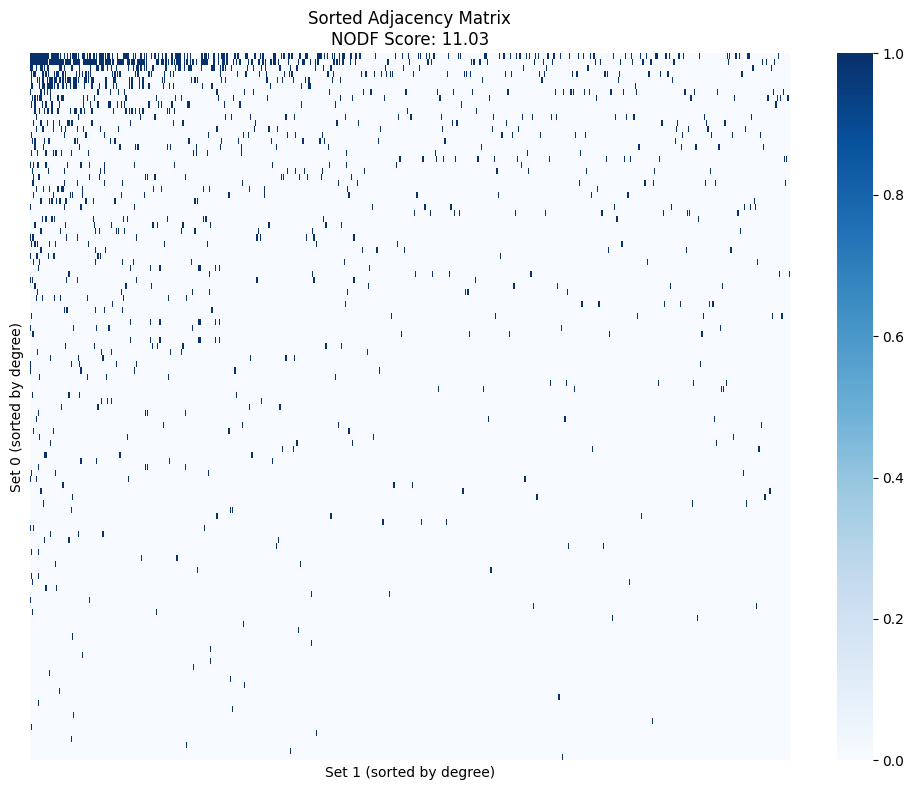

In [ ]:
# Nestedness matrix visualization
plt.figure(figsize=(10, 8))
visualize_nestedness_matrix(network_analysis['nestedness'])

# @note the matrix is sparse, if we remove less connected nodes maybe nestedness will be biger
# or simply cluster it before and measure in the clusters

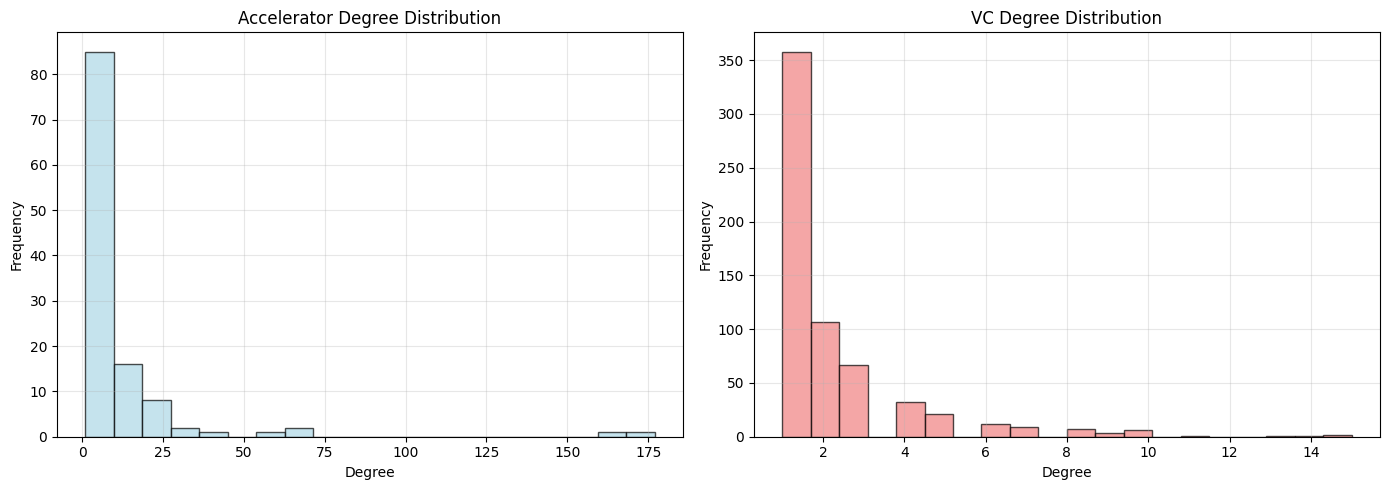

Accelerator degrees: mean=11.6, max=177
VC degrees: mean=2.2, max=15


In [12]:
# Degree distribution analysis
G = network_analysis['graph']
bip_info = is_bipartite_graph(G)
set_0 = bip_info['set_0']  # accelerators
set_1 = bip_info['set_1']  # VCs

degrees_acc = [G.degree(n) for n in set_0]
degrees_vc = [G.degree(n) for n in set_1]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Accelerator degrees
ax1.hist(degrees_acc, bins=20, alpha=0.7, color='lightblue', edgecolor='black')
ax1.set_xlabel('Degree')
ax1.set_ylabel('Frequency')
ax1.set_title('Accelerator Degree Distribution')
ax1.grid(True, alpha=0.3)

# VC degrees
ax2.hist(degrees_vc, bins=20, alpha=0.7, color='lightcoral', edgecolor='black')
ax2.set_xlabel('Degree')
ax2.set_ylabel('Frequency')
ax2.set_title('VC Degree Distribution')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Accelerator degrees: mean={np.mean(degrees_acc):.1f}, max={max(degrees_acc)}")
print(f"VC degrees: mean={np.mean(degrees_vc):.1f}, max={max(degrees_vc)}")

## Projection Networks Analysis

Analysis of accelerator and VC projection networks.

In [13]:
# Projection analysis -> transforms bipartite in unipartite
# we connect nodes that share neighbors -> weak connections
projections = network_analysis['projections']
acc_proj = projections['projection_0']
vc_proj = projections['projection_1']

print("=== Projection Networks ===")
print(f"Accelerator projection: {acc_proj.number_of_nodes()} nodes, {acc_proj.number_of_edges()} edges")
print(f"VC projection: {vc_proj.number_of_nodes()} nodes, {vc_proj.number_of_edges()} edges")

# Projection densities
acc_density = nx.density(acc_proj)
vc_density = nx.density(vc_proj)

print(f"Accelerator projection density: {acc_density:.3f}")
print(f"VC projection density: {vc_density:.3f}")

=== Projection Networks ===
Accelerator projection: 117 nodes, 909 edges
VC projection: 627 nodes, 33502 edges
Accelerator projection density: 0.134
VC projection density: 0.171


## Key Actors Analysis

Identification of central accelerators and VCs in the network.

In [ ]:
## Clustering Analysis

Advanced clustering analysis combining multiple approaches to understand community structure
in the accelerator-VC network. This section implements various clustering algorithms to identify
distinct investment communities and their characteristics.

# Initialize clustering analysis with multiple methods
print("=== Advanced Clustering Analysis ===")
print(f"Network size: {G.number_of_nodes()} nodes, {G.number_of_edges()} edges")
print(f"Bipartite composition: {len(set_0)} accelerators, {len(set_1)} VCs")

# Prepare for comprehensive clustering comparison
clustering_methods = {}
clustering_quality = {}

# Method 1: Use existing modularity-based clustering
clustering_methods['modularity'] = modularity_communities
clustering_quality['modularity'] = modularity_result['modularity']

print(f"\nModularity-based clustering: {modularity_result['num_communities']} communities")
print(f"Modularity score: {modularity_result['modularity']:.3f}")

=== Top 10 Accelerators by Degree ===
AGORANOV_Accelerators: 177 connections
WILCO_Accelerators: 166 connections
Crédit Agricole_Accelerators: 69 connections
The Family_Accelerators: 66 connections
SAP.iO_Accelerators: 56 connections
BOOST Programs_Accelerators: 41 connections
Incubateur Impulse_Accelerators: 34 connections
NUMA_Accelerators: 32 connections
Microsoft Accelerator Paris_Accelerators: 26 connections
Bpifrance Digital Venture_Accelerators: 25 connections

=== Top 10 VCs by Degree ===
European Innovation Council_VCs: 15 connections
Elaia_VCs: 15 connections
Omnes Capital_VCs: 14 connections
Seventure Partners_VCs: 13 connections
Alven_VCs: 11 connections
XAnge_VCs: 10 connections
Starquest Capital_VCs: 10 connections
CapHorn Invest_VCs: 10 connections
Supernova Invest_VCs: 10 connections
SOSV_VCs: 10 connections


In [ ]:
# Top accelerators and VCs by degree
acc_degrees = [(n, G.degree(n)) for n in set_0]
vc_degrees = [(n, G.degree(n)) for n in set_1]

acc_degrees.sort(key=lambda x: x[1], reverse=True)
vc_degrees.sort(key=lambda x: x[1], reverse=True)

print("=== Top 10 Accelerators by Degree ===")
for name, degree in acc_degrees[:10]:
    print(f"{name}: {degree} connections")

print("\n=== Top 10 VCs by Degree ===")
for name, degree in vc_degrees[:10]:
    print(f"{name}: {degree} connections")

## French Network Report

Comprehensive summary for comparative analysis with other ecosystems.

In [ ]:
# Generate comprehensive report
french_network_report = {
    'dataset': 'French Startup Ecosystem',
    'analysis_date': '2025-07-21',
    'network_size': {
        'total_nodes': basic_metrics['num_nodes'],
        'accelerators': basic_metrics['set_0_size'],
        'vcs': basic_metrics['set_1_size'],
        'total_edges': basic_metrics['num_edges']
    },
    'structural_metrics': {
        'density': basic_metrics['density'],
        'connectance': ecological_summary['connectance'],
        'components': basic_metrics['num_components'],
        'largest_component_size': basic_metrics['largest_component_size']
    },
    'ecological_metrics': {
        'nestedness_nodf': ecological_summary['nestedness_nodf'],
        'modularity': ecological_summary['modularity'],
        'cross_assortativity': ecological_summary['cross_assortativity']
    },
    'degree_statistics': {
        'acc_mean_degree': np.mean(degrees_acc),
        'acc_max_degree': max(degrees_acc),
        'vc_mean_degree': np.mean(degrees_vc),
        'vc_max_degree': max(degrees_vc)
    },
    'ecological_interpretation': ecology_summary,
    'top_actors': {
        'top_accelerators': [{'name': name, 'degree': degree} for name, degree in acc_degrees[:5]],
        'top_vcs': [{'name': name, 'degree': degree} for name, degree in vc_degrees[:5]]
    }
}

print(f"Analysis Date: {french_network_report['analysis_date']}")
print(f"Dataset: {french_network_report['dataset']}")

print("\n--- Network Structure ---")
ns = french_network_report['network_size']
print(f"Total nodes: {ns['total_nodes']} ({ns['accelerators']} accelerators + {ns['vcs']} VCs)")
print(f"Total edges: {ns['total_edges']}")

print("\n--- Key Metrics ---")
sm = french_network_report['structural_metrics']
em = french_network_report['ecological_metrics']
print(f"Density: {sm['density']:.3f}")
print(f"Connectance: {sm['connectance']:.3f}")
print(f"Nestedness (NODF): {em['nestedness_nodf']:.1f}")
print(f"Modularity: {em['modularity']:.3f}")
print(f"Cross-assortativity: {em['cross_assortativity']:.3f}")

print("\n--- Ecological Classification ---")
ei = french_network_report['ecological_interpretation']
print(f"Network Type: {ei['network_type']}")
print(f"Resilience Pattern: {ei['resilience_prediction']}")

=== FRENCH ACCELERATOR-VC NETWORK REPORT ===
Analysis Date: 2025-07-21
Dataset: French Startup Ecosystem

--- Network Structure ---
Total nodes: 744 (117 accelerators + 627 VCs)
Total edges: 1352

--- Key Metrics ---
Density: 0.018
Connectance: 0.018
Nestedness (NODF): 11.0
Modularity: 0.302
Cross-assortativity: -0.056

--- Ecological Classification ---
Network Type: Modular (compartmentalized)
Resilience Pattern: Variable resilience patterns

--- Usage ---
This report provides baseline characteristics of the French accelerator-VC network
for comparative analysis with other national ecosystems or temporal evolution.


In [ ]:
# Save report for future comparisons
import json
with open('french_network_report_2025.json', 'w') as f:
    json.dump(french_network_report, f, indent=2, default=str)

print("French network report saved to 'french_network_report_2025.json'")
print("Ready for comparative analysis with other datasets.")

## Community Detection Analysis

Identification of communities in the accelerator-VC network using multiple detection algorithms.
This analysis follows techniques from network science literature for bipartite networks.

In [ ]:
import networkx.algorithms.community as nx_community
from sklearn.cluster import SpectralClustering
from collections import Counter

# Get the bipartite graph
G = network_analysis['graph']
bip_info = is_bipartite_graph(G)
set_0 = bip_info['set_0']  # accelerators
set_1 = bip_info['set_1']  # VCs

print(f"Network for community detection: {G.number_of_nodes()} nodes, {G.number_of_edges()} edges")
print(f"Accelerators: {len(set_0)}, VCs: {len(set_1)}")

### Method 1: Modularity-Based Community Detection

Using greedy modularity optimization, which is already implemented in our network analysis.

In [ ]:
# Modularity-based communities (already computed)
modularity_result = network_analysis['modularity_analysis']
modularity_communities = modularity_result['communities']

print("=== Modularity-Based Communities ===")
print(f"Modularity Score: {modularity_result['modularity']:.3f}")
print(f"Number of Communities: {modularity_result['num_communities']}")

# Analyze community composition
community_stats = {}
for node, comm_id in modularity_communities.items():
    if comm_id not in community_stats:
        community_stats[comm_id] = {'accelerators': 0, 'vcs': 0, 'total': 0}
    
    if node in set_0:
        community_stats[comm_id]['accelerators'] += 1
    else:
        community_stats[comm_id]['vcs'] += 1
    community_stats[comm_id]['total'] += 1

print("\nCommunity Composition:")
for comm_id, stats in sorted(community_stats.items()):
    acc_pct = stats['accelerators'] / stats['total'] * 100
    vc_pct = stats['vcs'] / stats['total'] * 100
    print(f"Community {comm_id}: {stats['total']} nodes ({stats['accelerators']} acc, {stats['vcs']} vcs) - {acc_pct:.1f}% acc, {vc_pct:.1f}% vc")

### Method 2: Label Propagation Algorithm

A fast community detection method that propagates labels through the network.

In [ ]:
# Label Propagation
try:
    label_prop_communities = nx_community.label_propagation_communities(G)
    label_prop_communities = list(label_prop_communities)
    
    # Convert to node-community mapping
    label_prop_dict = {}
    for i, community in enumerate(label_prop_communities):
        for node in community:
            label_prop_dict[node] = i
    
    print("=== Label Propagation Communities ===")
    print(f"Number of Communities: {len(label_prop_communities)}")
    
    # Analyze composition
    lp_stats = {}
    for node, comm_id in label_prop_dict.items():
        if comm_id not in lp_stats:
            lp_stats[comm_id] = {'accelerators': 0, 'vcs': 0, 'total': 0}
        
        if node in set_0:
            lp_stats[comm_id]['accelerators'] += 1
        else:
            lp_stats[comm_id]['vcs'] += 1
        lp_stats[comm_id]['total'] += 1
    
    print("\nCommunity Composition (Label Propagation):")
    for comm_id, stats in sorted(lp_stats.items()):
        if stats['total'] > 1:  # Only show communities with more than 1 node
            acc_pct = stats['accelerators'] / stats['total'] * 100
            vc_pct = stats['vcs'] / stats['total'] * 100
            print(f"Community {comm_id}: {stats['total']} nodes ({stats['accelerators']} acc, {stats['vcs']} vcs) - {acc_pct:.1f}% acc, {vc_pct:.1f}% vc")

except Exception as e:
    print(f"Label propagation failed: {e}")
    label_prop_dict = None

### Method 3: Edge Betweenness Clustering

Hierarchical community detection based on edge betweenness centrality.

In [ ]:
# Edge Betweenness (Girvan-Newman) - Fixed implementation
def girvan_newman_communities(G, k=None, max_iterations=10):
    """Apply Girvan-Newman algorithm to detect k communities"""
    communities_generator = nx_community.girvan_newman(G)
    
    if k is None:
        # Find optimal number of communities
        best_modularity = -1
        best_communities = None
        
        try:
            for i, communities in enumerate(communities_generator):
                if i >= max_iterations:  # Limit iterations
                    break
                
                # Calculate modularity
                mod = nx_community.modularity(G, communities)
                if mod > best_modularity:
                    best_modularity = mod
                    best_communities = communities
                
                # Stop if we have reasonable number of communities
                if len(communities) >= min(10, G.number_of_nodes() // 5):
                    break
        except:
            print("Girvan-Newman algorithm terminated early")
        
        return best_communities, best_modularity
    else:
        # Get exactly k communities
        try:
            for i, communities in enumerate(communities_generator):
                if len(communities) >= k:
                    mod = nx_community.modularity(G, communities)
                    return communities, mod
        except:
            print("Failed to find exactly k communities")
            return None, -1

# Apply Girvan-Newman (limit to smaller networks due to computational complexity)
print("=== Girvan-Newman Community Detection ===")
if G.number_of_nodes() < 100:
    try:
        gn_communities, gn_modularity = girvan_newman_communities(G, max_iterations=5)
        
        if gn_communities:
            # Convert to node-community mapping
            gn_dict = {}
            for i, community in enumerate(gn_communities):
                for node in community:
                    gn_dict[node] = i
            
            print(f"Number of communities: {len(gn_communities)}")
            print(f"Modularity: {gn_modularity:.3f}")
            
            # Analyze composition
            gn_stats = {}
            for node, comm_id in gn_dict.items():
                if comm_id not in gn_stats:
                    gn_stats[comm_id] = {'accelerators': 0, 'vcs': 0, 'total': 0}
                
                if node in set_0:
                    gn_stats[comm_id]['accelerators'] += 1
                else:
                    gn_stats[comm_id]['vcs'] += 1
                gn_stats[comm_id]['total'] += 1
            
            print("\nCommunity Composition (Girvan-Newman):")
            for comm_id, stats in sorted(gn_stats.items()):
                if stats['total'] > 1:
                    acc_pct = stats['accelerators'] / stats['total'] * 100
                    vc_pct = stats['vcs'] / stats['total'] * 100
                    print(f"Community {comm_id}: {stats['total']} nodes ({stats['accelerators']} acc, {stats['vcs']} vcs) - {acc_pct:.1f}% acc, {vc_pct:.1f}% vc")
        else:
            print("Girvan-Newman failed to detect communities")
            gn_dict = None
            gn_modularity = -1
    except Exception as e:
        print(f"Girvan-Newman failed: {e}")
        gn_dict = None
        gn_modularity = -1
else:
    print(f"Network too large ({G.number_of_nodes()} nodes) for Girvan-Newman algorithm")
    print("Skipping Girvan-Newman to avoid computational complexity")
    gn_dict = None
    gn_modularity = -1

### Method 4: Spectral Clustering on Projections

Apply spectral clustering to the unipartite projections of accelerators and VCs.

In [ ]:
# Spectral clustering on projections
projections = network_analysis['projections']
acc_proj = projections['projection_0']
vc_proj = projections['projection_1']

def spectral_clustering_projection(proj_graph, n_clusters=3):
    """Apply spectral clustering to projection network"""
    if proj_graph.number_of_nodes() < n_clusters:
        return None
    
    # Get adjacency matrix
    nodes = list(proj_graph.nodes())
    adj_matrix = nx.adjacency_matrix(proj_graph, nodelist=nodes)
    
    # Apply spectral clustering
    clustering = SpectralClustering(n_clusters=n_clusters, random_state=42)
    cluster_labels = clustering.fit_predict(adj_matrix.toarray())
    
    # Create node-cluster mapping
    node_clusters = dict(zip(nodes, cluster_labels))
    
    return node_clusters

# Accelerator spectral clustering
print("=== Spectral Clustering on Projections ===")
if acc_proj.number_of_nodes() >= 3:
    n_acc_clusters = min(5, acc_proj.number_of_nodes() // 3)  # Adaptive number of clusters
    acc_spectral = spectral_clustering_projection(acc_proj, n_acc_clusters)
    
    if acc_spectral:
        print(f"\nAccelerator Clusters ({n_acc_clusters} clusters):")
        acc_cluster_counts = Counter(acc_spectral.values())
        for cluster_id, count in sorted(acc_cluster_counts.items()):
            print(f"Cluster {cluster_id}: {count} accelerators")
        
        # Show some examples
        print("\nSample accelerators by cluster:")
        for cluster_id in sorted(acc_cluster_counts.keys()):
            cluster_nodes = [node for node, cid in acc_spectral.items() if cid == cluster_id]
            sample_nodes = cluster_nodes[:3]  # Show first 3
            print(f"Cluster {cluster_id}: {', '.join(sample_nodes)}")
else:
    print("Not enough accelerators for spectral clustering")
    acc_spectral = None

# VC spectral clustering
if vc_proj.number_of_nodes() >= 3:
    n_vc_clusters = min(5, vc_proj.number_of_nodes() // 3)
    vc_spectral = spectral_clustering_projection(vc_proj, n_vc_clusters)
    
    if vc_spectral:
        print(f"\nVC Clusters ({n_vc_clusters} clusters):")
        vc_cluster_counts = Counter(vc_spectral.values())
        for cluster_id, count in sorted(vc_cluster_counts.items()):
            print(f"Cluster {cluster_id}: {count} VCs")
        
        # Show some examples
        print("\nSample VCs by cluster:")
        for cluster_id in sorted(vc_cluster_counts.keys()):
            cluster_nodes = [node for node, cid in vc_spectral.items() if cid == cluster_id]
            sample_nodes = cluster_nodes[:3]
            print(f"Cluster {cluster_id}: {', '.join(sample_nodes)}")
else:
    print("Not enough VCs for spectral clustering")
    vc_spectral = None

### Community Detection Comparison

Compare the different community detection methods and their quality metrics.

In [ ]:
# Compare community detection methods
print("=== Community Detection Methods Comparison ===")

methods_summary = {}

# Modularity-based
methods_summary['Modularity-based'] = {
    'num_communities': modularity_result['num_communities'],
    'modularity': modularity_result['modularity'],
    'description': 'Greedy modularity optimization'
}

# Label propagation
if label_prop_dict:
    lp_modularity = nx_community.modularity(G, label_prop_communities)
    methods_summary['Label Propagation'] = {
        'num_communities': len(label_prop_communities),
        'modularity': lp_modularity,
        'description': 'Fast label propagation algorithm'
    }

# Girvan-Newman
if gn_dict:
    methods_summary['Girvan-Newman'] = {
        'num_communities': len(set(gn_dict.values())),
        'modularity': gn_modularity,
        'description': 'Edge betweenness hierarchical clustering'
    }

# Print comparison
for method, stats in methods_summary.items():
    print(f"\n{method}:")
    print(f"  Communities: {stats['num_communities']}")
    print(f"  Modularity: {stats['modularity']:.3f}")
    print(f"  Description: {stats['description']}")

# Determine best method
if methods_summary:
    best_method = max(methods_summary.items(), key=lambda x: x[1]['modularity'])
    print(f"\nBest method by modularity: {best_method[0]} (modularity = {best_method[1]['modularity']:.3f})")

### Community Visualization

Visualize the detected communities in the bipartite network.

In [ ]:
# Visualize communities
import matplotlib.colors as mcolors

def visualize_bipartite_communities(G, communities_dict, title="Community Structure"):
    """Visualize bipartite graph with community colors"""
    if not communities_dict:
        print("No communities to visualize")
        return
    
    plt.figure(figsize=(14, 10))
    
    # Create layout
    pos = nx.spring_layout(G, k=2, iterations=50)
    
    # Get bipartite sets
    bip_info = is_bipartite_graph(G)
    set_0 = bip_info['set_0']
    set_1 = bip_info['set_1']
    
    # Get unique communities
    unique_communities = set(communities_dict.values())
    colors = plt.cm.Set3(np.linspace(0, 1, len(unique_communities)))
    community_colors = dict(zip(unique_communities, colors))
    
    # Draw nodes by community
    for comm_id in unique_communities:
        # Accelerators in this community
        acc_nodes = [n for n in set_0 if communities_dict.get(n) == comm_id]
        vc_nodes = [n for n in set_1 if communities_dict.get(n) == comm_id]
        
        if acc_nodes:
            nx.draw_networkx_nodes(G, pos, nodelist=acc_nodes, 
                                 node_color=[community_colors[comm_id]], 
                                 node_shape='s', node_size=300, 
                                 label=f'Comm {comm_id} (Acc)')
        
        if vc_nodes:
            nx.draw_networkx_nodes(G, pos, nodelist=vc_nodes,
                                 node_color=[community_colors[comm_id]], 
                                 node_shape='o', node_size=200,
                                 label=f'Comm {comm_id} (VC)')
    
    # Draw edges
    nx.draw_networkx_edges(G, pos, alpha=0.3, width=0.5)
    
    plt.title(title, size=16)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Visualize best community structure (by modularity)
if 'best_method' in locals() and best_method:
    method_name = best_method[0]
    
    if method_name == 'Modularity-based':
        visualize_bipartite_communities(G, modularity_communities, 
                                       f"Communities ({method_name})")
    elif method_name == 'Label Propagation' and label_prop_dict:
        visualize_bipartite_communities(G, label_prop_dict, 
                                       f"Communities ({method_name})")
    elif method_name == 'Girvan-Newman' and gn_dict:
        visualize_bipartite_communities(G, gn_dict, 
                                       f"Communities ({method_name})")
else:
    # Default to modularity-based
    visualize_bipartite_communities(G, modularity_communities, 
                                   "Communities (Modularity-based)")

### Community Analysis and Interpretation

Analyze the characteristics and meaning of detected communities.

In [ ]:
# Detailed community analysis
def analyze_community_characteristics(G, communities_dict, investment_data=None):
    """Analyze characteristics of detected communities"""
    
    bip_info = is_bipartite_graph(G)
    set_0 = bip_info['set_0']  # accelerators
    set_1 = bip_info['set_1']  # VCs
    
    community_analysis = {}
    
    for comm_id in set(communities_dict.values()):
        comm_nodes = [n for n, c in communities_dict.items() if c == comm_id]
        comm_acc = [n for n in comm_nodes if n in set_0]
        comm_vc = [n for n in comm_nodes if n in set_1]
        
        # Basic stats
        analysis = {
            'total_nodes': len(comm_nodes),
            'accelerators': comm_acc,
            'vcs': comm_vc,
            'acc_count': len(comm_acc),
            'vc_count': len(comm_vc),
            'acc_ratio': len(comm_acc) / len(comm_nodes) if comm_nodes else 0
        }
        
        # Internal connectivity
        subgraph = G.subgraph(comm_nodes)
        analysis['internal_edges'] = subgraph.number_of_edges()
        analysis['internal_density'] = nx.density(subgraph) if subgraph.number_of_nodes() > 1 else 0
        
        # Degree statistics within community
        if comm_nodes:
            comm_degrees = [G.degree(n) for n in comm_nodes]
            analysis['avg_degree'] = np.mean(comm_degrees)
            analysis['max_degree_node'] = max(comm_nodes, key=lambda x: G.degree(x))
        
        community_analysis[comm_id] = analysis
    
    return community_analysis

# Analyze the best community structure
print("=== Detailed Community Analysis ===")

# Use modularity-based communities for detailed analysis
comm_analysis = analyze_community_characteristics(G, modularity_communities)

for comm_id, analysis in sorted(comm_analysis.items()):
    print(f"\n--- Community {comm_id} ---")
    print(f"Size: {analysis['total_nodes']} nodes ({analysis['acc_count']} accelerators, {analysis['vc_count']} VCs)")
    print(f"Composition: {analysis['acc_ratio']:.1%} accelerators")
    print(f"Internal density: {analysis['internal_density']:.3f}")
    print(f"Internal edges: {analysis['internal_edges']}")
    
    if analysis['total_nodes'] > 0:
        print(f"Average degree: {analysis['avg_degree']:.1f}")
        print(f"Highest degree node: {analysis['max_degree_node']} (degree: {G.degree(analysis['max_degree_node'])})")
    
    # Show key members
    if analysis['accelerators']:
        print(f"Key accelerators: {', '.join(analysis['accelerators'][:3])}{'...' if len(analysis['accelerators']) > 3 else ''}")
    if analysis['vcs']:
        print(f"Key VCs: {', '.join(analysis['vcs'][:3])}{'...' if len(analysis['vcs']) > 3 else ''}")

### Community Summary and Insights

Synthesize findings from community detection analysis.

In [ ]:
# Summary of community detection findings
print("=== Community Detection Summary ===")

# Network-level insights
total_communities = len(set(modularity_communities.values()))
modularity_score = modularity_result['modularity']

print(f"Network Structure:")
print(f"- Total communities detected: {total_communities}")
print(f"- Modularity score: {modularity_score:.3f}")

if modularity_score > 0.3:
    structure_type = "Strong community structure"
elif modularity_score > 0.1:
    structure_type = "Moderate community structure"
else:
    structure_type = "Weak community structure"

print(f"- Network structure: {structure_type}")

# Community characteristics
community_sizes = [analysis['total_nodes'] for analysis in comm_analysis.values()]
community_acc_ratios = [analysis['acc_ratio'] for analysis in comm_analysis.values()]

print(f"\nCommunity Characteristics:")
print(f"- Average community size: {np.mean(community_sizes):.1f} nodes")
print(f"- Largest community: {max(community_sizes)} nodes")
print(f"- Average accelerator ratio: {np.mean(community_acc_ratios):.1%}")

# Identify community types
print(f"\nCommunity Types:")
for comm_id, analysis in sorted(comm_analysis.items()):
    if analysis['acc_ratio'] > 0.7:
        comm_type = "Accelerator-dominated"
    elif analysis['acc_ratio'] < 0.3:
        comm_type = "VC-dominated"
    else:
        comm_type = "Mixed"
    
    print(f"- Community {comm_id}: {comm_type} ({analysis['total_nodes']} nodes)")

# Strategic insights
print(f"\nStrategic Insights:")
print(f"- The network shows {structure_type.lower()}, indicating {'clear' if modularity_score > 0.3 else 'some' if modularity_score > 0.1 else 'limited'} specialization")
print(f"- {total_communities} distinct investment communities suggest {'diverse' if total_communities > 3 else 'concentrated'} ecosystem segments")

if any(analysis['acc_ratio'] > 0.7 for analysis in comm_analysis.values()):
    print(f"- Some communities are accelerator-dominated, suggesting specialized accelerator networks")
if any(analysis['acc_ratio'] < 0.3 for analysis in comm_analysis.values()):
    print(f"- Some communities are VC-dominated, indicating VC syndication patterns")

# Add to report
community_summary = {
    'total_communities': total_communities,
    'modularity_score': modularity_score,
    'structure_type': structure_type,
    'avg_community_size': np.mean(community_sizes),
    'largest_community_size': max(community_sizes),
    'avg_accelerator_ratio': np.mean(community_acc_ratios),
    'community_details': comm_analysis
}

print(f"\nCommunity analysis added to network report.")

### Clustering Validation and Stability Analysis

Advanced validation metrics to assess the quality and stability of detected communities.

In [ ]:
from sklearn.metrics import silhouette_score, adjusted_rand_score
import scipy.sparse as sp

def evaluate_clustering_quality(G, communities_dict, method_name):
    """Evaluate clustering quality using multiple metrics"""
    
    # Convert graph to adjacency matrix for silhouette analysis
    nodes = list(G.nodes())
    adj_matrix = nx.adjacency_matrix(G, nodelist=nodes)
    
    # Create labels array
    labels = [communities_dict.get(node, -1) for node in nodes]
    
    # Calculate metrics
    metrics = {
        'method': method_name,
        'num_communities': len(set(labels)) if -1 not in labels else len(set(labels)) - 1,
        'modularity': nx_community.modularity(G, [set(n for n, c in communities_dict.items() if c == comm_id) for comm_id in set(communities_dict.values())])
    }
    
    # Silhouette score (if more than 1 community)
    try:
        if len(set(labels)) > 1 and -1 not in labels:
            # Use distance matrix based on shortest paths
            distance_matrix = []
            for i, node_i in enumerate(nodes):
                row = []
                for j, node_j in enumerate(nodes):
                    if i == j:
                        row.append(0)
                    else:
                        try:
                            dist = nx.shortest_path_length(G, node_i, node_j)
                            row.append(dist)
                        except:
                            row.append(float('inf'))
                distance_matrix.append(row)
            
            # Replace inf with max finite distance + 1
            distance_matrix = np.array(distance_matrix)
            max_finite = np.max(distance_matrix[distance_matrix != float('inf')])
            distance_matrix[distance_matrix == float('inf')] = max_finite + 1
            
            sil_score = silhouette_score(distance_matrix, labels, metric='precomputed')
            metrics['silhouette_score'] = sil_score
        else:
            metrics['silhouette_score'] = None
    except:
        metrics['silhouette_score'] = None
    
    return metrics

# Evaluate all clustering methods
print("=== Clustering Quality Evaluation ===")

clustering_evaluations = {}

# Evaluate modularity-based clustering
mod_eval = evaluate_clustering_quality(G, modularity_communities, 'Modularity-based')
clustering_evaluations['modularity'] = mod_eval

print(f"\nModularity-based Clustering:")
print(f"  Communities: {mod_eval['num_communities']}")
print(f"  Modularity: {mod_eval['modularity']:.3f}")
if mod_eval['silhouette_score'] is not None:
    print(f"  Silhouette Score: {mod_eval['silhouette_score']:.3f}")

# Evaluate label propagation if available
if 'label_prop_dict' in locals() and label_prop_dict:
    lp_eval = evaluate_clustering_quality(G, label_prop_dict, 'Label Propagation')
    clustering_evaluations['label_propagation'] = lp_eval
    
    print(f"\nLabel Propagation Clustering:")
    print(f"  Communities: {lp_eval['num_communities']}")
    print(f"  Modularity: {lp_eval['modularity']:.3f}")
    if lp_eval['silhouette_score'] is not None:
        print(f"  Silhouette Score: {lp_eval['silhouette_score']:.3f}")

# Evaluate Girvan-Newman if available
if 'gn_dict' in locals() and gn_dict:
    gn_eval = evaluate_clustering_quality(G, gn_dict, 'Girvan-Newman')
    clustering_evaluations['girvan_newman'] = gn_eval
    
    print(f"\nGirvan-Newman Clustering:")
    print(f"  Communities: {gn_eval['num_communities']}")
    print(f"  Modularity: {gn_eval['modularity']:.3f}")
    if gn_eval['silhouette_score'] is not None:
        print(f"  Silhouette Score: {gn_eval['silhouette_score']:.3f}")

# Overall best method
best_overall = max(clustering_evaluations.values(), key=lambda x: x['modularity'])
print(f"\n=== Best Overall Method: {best_overall['method']} ===")
print(f"Modularity: {best_overall['modularity']:.3f}")
if best_overall['silhouette_score'] is not None:
    print(f"Silhouette Score: {best_overall['silhouette_score']:.3f}")

## Network Robustness Analysis

Analysis of network resilience to node and edge removal, following ecological
principles of ecosystem stability and robustness.

In [ ]:
# Network robustness analysis
def analyze_network_robustness(G, num_simulations=10):
    """Analyze network robustness to random and targeted node removal"""
    
    original_nodes = G.number_of_nodes()
    original_edges = G.number_of_edges()
    
    if original_nodes < 10:
        print("Network too small for robustness analysis")
        return None
    
    print(f"=== Network Robustness Analysis ===")
    print(f"Original network: {original_nodes} nodes, {original_edges} edges")
    
    # Get node degrees for targeted attack
    node_degrees = [(node, G.degree(node)) for node in G.nodes()]
    node_degrees.sort(key=lambda x: x[1], reverse=True)
    
    # Simulation parameters
    removal_fractions = [0.1, 0.2, 0.3, 0.4, 0.5]
    results = {
        'random_removal': {},
        'targeted_removal': {}
    }
    
    for fraction in removal_fractions:
        num_remove = int(original_nodes * fraction)
        if num_remove == 0:
            continue
        
        # Random removal simulation
        random_results = []
        for sim in range(num_simulations):
            G_copy = G.copy()
            nodes_to_remove = np.random.choice(list(G_copy.nodes()), num_remove, replace=False)
            G_copy.remove_nodes_from(nodes_to_remove)
            
            # Measure impact
            remaining_nodes = G_copy.number_of_nodes()
            remaining_edges = G_copy.number_of_edges()
            num_components = nx.number_connected_components(G_copy)
            largest_component = max(nx.connected_components(G_copy), key=len) if num_components > 0 else set()
            
            random_results.append({
                'remaining_nodes': remaining_nodes,
                'remaining_edges': remaining_edges,
                'num_components': num_components,
                'largest_component_size': len(largest_component)
            })
        
        # Average random results
        results['random_removal'][fraction] = {
            'remaining_nodes': np.mean([r['remaining_nodes'] for r in random_results]),
            'remaining_edges': np.mean([r['remaining_edges'] for r in random_results]),
            'num_components': np.mean([r['num_components'] for r in random_results]),
            'largest_component_size': np.mean([r['largest_component_size'] for r in random_results])
        }
        
        # Targeted removal (highest degree nodes)
        G_targeted = G.copy()
        high_degree_nodes = [node for node, degree in node_degrees[:num_remove]]
        G_targeted.remove_nodes_from(high_degree_nodes)
        
        num_components_targeted = nx.number_connected_components(G_targeted)
        largest_component_targeted = max(nx.connected_components(G_targeted), key=len) if num_components_targeted > 0 else set()
        
        results['targeted_removal'][fraction] = {
            'remaining_nodes': G_targeted.number_of_nodes(),
            'remaining_edges': G_targeted.number_of_edges(),
            'num_components': num_components_targeted,
            'largest_component_size': len(largest_component_targeted)
        }
    
    return results

# Run robustness analysis
print("\n=== Network Robustness Analysis ===")

try:
    robustness_results = analyze_network_robustness(G, num_simulations=5)
except Exception as e:
    print(f"Robustness analysis failed: {e}")
    robustness_results = None

## Temporal Network Evolution Analysis

Analysis of how the accelerator-VC network structure changes over time,
examining the evolution of communities and ecological metrics.

In [ ]:
# Temporal analysis of network evolution
def analyze_temporal_network_evolution(acc_vc_edges, time_col='announced_on'):
    """Analyze how network structure evolves over time"""
    
    if time_col not in acc_vc_edges.columns:
        print(f"Warning: {time_col} column not found. Using all data as single time period.")
        return None
    
    # Convert to datetime if needed
    if not pd.api.types.is_datetime64_any_dtype(acc_vc_edges[time_col]):
        acc_vc_edges[time_col] = pd.to_datetime(acc_vc_edges[time_col], errors='coerce')
    
    # Remove rows with invalid dates
    valid_dates = acc_vc_edges.dropna(subset=[time_col])
    
    if len(valid_dates) == 0:
        print("No valid dates found for temporal analysis")
        return None
    
    # Create yearly windows
    valid_dates['year'] = valid_dates[time_col].dt.year
    years = sorted(valid_dates['year'].unique())
    
    if len(years) < 3:
        print(f"Not enough years for temporal analysis (found {len(years)} years)")
        return None
    
    print(f"=== Temporal Analysis: {years[0]} to {years[-1]} ===")
    print(f"Years analyzed: {len(years)}")
    
    temporal_results = {}
    
    # Analyze network for each year (cumulative)
    for year in years:
        # Cumulative data up to this year
        year_data = valid_dates[valid_dates['year'] <= year]
        
        if len(year_data) < 5:  # Need minimum connections
            continue
        
        try:
            # Build network for this time period
            year_analysis = analyze_bipartite_structure_robust(
                year_data,
                'investor_name_acc',
                'investor_name_vc',
                'total_funding_usd',
                'Accelerators',
                'VCs',
                handle_overlap='suffix'
            )
            
            # Extract key metrics
            basic = year_analysis['basic_metrics']
            ecological = year_analysis['ecological_summary']
            modularity_info = year_analysis['modularity_analysis']
            
            temporal_results[year] = {
                'year': year,
                'num_nodes': basic['num_nodes'],
                'num_edges': basic['num_edges'],
                'accelerators': basic['set_0_size'],
                'vcs': basic['set_1_size'],
                'density': basic['density'],
                'connectance': ecological['connectance'],
                'nestedness': ecological['nestedness_nodf'],
                'modularity': ecological['modularity'],
                'num_communities': modularity_info['num_communities'],
                'largest_component': basic['largest_component_size'],
                'num_components': basic['num_components']
            }
            
        except Exception as e:
            print(f"Failed to analyze year {year}: {e}")
            continue
    
    return temporal_results

# Run temporal analysis
print("\n=== Temporal Network Evolution ===")

# Check if we have temporal data
temporal_columns = ['announced_on', 'funded_at', 'investment_date']
time_col = None

for col in temporal_columns:
    if col in acc_vc_edges.columns:
        time_col = col
        break

if time_col:
    temporal_results = analyze_temporal_network_evolution(acc_vc_edges, time_col)
else:
    print("No temporal columns found. Skipping temporal analysis.")
    print(f"Available columns: {list(acc_vc_edges.columns)}")
    temporal_results = None

In [ ]:
# Visualize temporal evolution
if temporal_results and len(temporal_results) > 2:
    
    # Convert to DataFrame for easier plotting
    temporal_df = pd.DataFrame(temporal_results).T
    
    # Create temporal visualizations
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('Network Evolution Over Time', fontsize=16)
    
    # Network size evolution
    axes[0,0].plot(temporal_df['year'], temporal_df['num_nodes'], 'o-', label='Total Nodes')
    axes[0,0].plot(temporal_df['year'], temporal_df['accelerators'], 's-', label='Accelerators')
    axes[0,0].plot(temporal_df['year'], temporal_df['vcs'], '^-', label='VCs')
    axes[0,0].set_xlabel('Year')
    axes[0,0].set_ylabel('Number of Nodes')
    axes[0,0].set_title('Network Size Evolution')
    axes[0,0].legend()
    axes[0,0].grid(True, alpha=0.3)
    
    # Connectivity evolution
    axes[0,1].plot(temporal_df['year'], temporal_df['num_edges'], 'o-', color='green')
    axes[0,1].set_xlabel('Year')
    axes[0,1].set_ylabel('Number of Edges')
    axes[0,1].set_title('Connectivity Evolution')
    axes[0,1].grid(True, alpha=0.3)
    
    # Density evolution
    axes[0,2].plot(temporal_df['year'], temporal_df['density'], 'o-', color='red')
    axes[0,2].set_xlabel('Year')
    axes[0,2].set_ylabel('Network Density')
    axes[0,2].set_title('Density Evolution')
    axes[0,2].grid(True, alpha=0.3)
    
    # Ecological metrics evolution
    axes[1,0].plot(temporal_df['year'], temporal_df['nestedness'], 'o-', label='Nestedness')
    axes[1,0].set_xlabel('Year')
    axes[1,0].set_ylabel('Nestedness (NODF)')
    axes[1,0].set_title('Nestedness Evolution')
    axes[1,0].grid(True, alpha=0.3)
    
    # Modularity evolution
    axes[1,1].plot(temporal_df['year'], temporal_df['modularity'], 'o-', color='purple')
    axes[1,1].set_xlabel('Year')
    axes[1,1].set_ylabel('Modularity')
    axes[1,1].set_title('Modularity Evolution')
    axes[1,1].grid(True, alpha=0.3)
    
    # Communities evolution
    axes[1,2].plot(temporal_df['year'], temporal_df['num_communities'], 'o-', color='orange')
    axes[1,2].set_xlabel('Year')
    axes[1,2].set_ylabel('Number of Communities')
    axes[1,2].set_title('Community Structure Evolution')
    axes[1,2].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print temporal insights
    print("\n=== Temporal Evolution Insights ===")
    
    # Calculate growth rates
    first_year = temporal_df.iloc[0]
    last_year = temporal_df.iloc[-1]
    years_span = last_year['year'] - first_year['year']
    
    if years_span > 0:
        node_growth = (last_year['num_nodes'] - first_year['num_nodes']) / years_span
        edge_growth = (last_year['num_edges'] - first_year['num_edges']) / years_span
        
        print(f"Network Growth ({first_year['year']:.0f}-{last_year['year']:.0f}):")
        print(f"  Average node growth: {node_growth:.1f} nodes/year")
        print(f"  Average edge growth: {edge_growth:.1f} edges/year")
        
        # Density trend
        density_change = last_year['density'] - first_year['density']
        print(f"  Density change: {density_change:+.3f}")
        
        # Ecological evolution
        nestedness_change = last_year['nestedness'] - first_year['nestedness']
        modularity_change = last_year['modularity'] - first_year['modularity']
        
        print(f"\nEcological Evolution:")
        print(f"  Nestedness change: {nestedness_change:+.1f}")
        print(f"  Modularity change: {modularity_change:+.3f}")
        
        # Interpretation
        if density_change < -0.01:
            print(f"  → Network becoming more sparse over time")
        elif density_change > 0.01:
            print(f"  → Network becoming denser over time")
        else:
            print(f"  → Network density relatively stable")
            
        if modularity_change > 0.05:
            print(f"  → Community structure strengthening")
        elif modularity_change < -0.05:
            print(f"  → Community structure weakening")
        else:
            print(f"  → Community structure relatively stable")

elif temporal_results:
    print(f"Insufficient temporal data for visualization (only {len(temporal_results)} time periods)")
else:
    print("No temporal analysis results to visualize")

## Sector-Specific Network Analysis

Analysis of investment patterns by industry sectors to understand specialization
and identify sector-specific accelerator-VC communities.

In [ ]:
# Sector-specific analysis
def analyze_sector_networks(acc_vc_edges, companies_data):
    """Analyze network structure by industry sectors"""
    
    # Check if we have sector information
    sector_columns = ['industry_groups', 'category_list', 'industry', 'sector']
    sector_col = None
    
    for col in sector_columns:
        if col in companies_data.columns:
            sector_col = col
            break
    
    if not sector_col:
        print("No sector information found in companies data")
        return None
    
    print(f"=== Sector Analysis using {sector_col} ===")
    
    # Merge sector information with edges
    # Assuming acc_vc_edges has org_uuid that can be matched
    if 'org_uuid' not in acc_vc_edges.columns:
        print("No org_uuid found for sector matching")
        return None
    
    # Get company sectors
    company_sectors = companies_data[['uuid', sector_col]].copy()
    company_sectors = company_sectors.dropna(subset=[sector_col])
    
    # Merge with edges
    edges_with_sectors = acc_vc_edges.merge(
        company_sectors,
        left_on='org_uuid',
        right_on='uuid',
        how='left'
    )
    
    # Clean sector data
    edges_with_sectors = edges_with_sectors.dropna(subset=[sector_col])
    
    if len(edges_with_sectors) == 0:
        print("No sector data available after merge")
        return None
    
    # Parse sectors (they might be comma-separated)
    sector_list = []
    for _, row in edges_with_sectors.iterrows():
        sectors = str(row[sector_col]).split(',')
        for sector in sectors:
            sector = sector.strip()
            if sector and sector.lower() not in ['nan', 'none', '']:
                sector_list.append({
                    'investor_name_acc': row['investor_name_acc'],
                    'investor_name_vc': row['investor_name_vc'],
                    'sector': sector,
                    'total_funding_usd': row.get('total_funding_usd', 0)
                })
    
    sector_df = pd.DataFrame(sector_list)
    
    if len(sector_df) == 0:
        print("No valid sector data found")
        return None
    
    # Analyze top sectors
    sector_counts = sector_df['sector'].value_counts()
    top_sectors = sector_counts.head(10)
    
    print("Top Sectors:")
    for sector, count in top_sectors.items():
        print(f"- {sector}: {count} investments")
    
    # Visualize sector distribution
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_sectors.index, y=top_sectors.values, palette='viridis')
    plt.title('Top Sectors by Investment Count')
    plt.xlabel('Sector')
    plt.ylabel('Number of Investments')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    # Sector-specific networks
    sector_networks = {}
    for sector in top_sectors.index:
        sector_edges = edges_with_sectors[edges_with_sectors[sector_col].str.contains(sector, na=False)]
        if len(sector_edges) > 0:
            sector_network = extract_bipartite_edges_from_pairs(
                create_investment_pairs(
                    extract_accelerator_investments(sector_edges),
                    extract_vc_investments(sector_edges),
                    'acc', 'vc'
                ),
                'investor_name_acc',
                'investor_name_vc',
                'total_funding_usd'
            )
            sector_networks[sector] = sector_network
            
            # Analyze sector network
            sector_analysis = analyze_bipartite_structure_robust(
                sector_network,
                'investor_name_acc',
                'investor_name_vc',
                'total_funding_usd',
                'Accelerators',
                'VCs',
                handle_overlap='suffix'
            )
            
            # Extract and display key metrics
            sector_basic = sector_analysis['basic_metrics']
            sector_ecological = sector_analysis['ecological_summary']
            
            print(f"\nSector: {sector}")
            print(f"Nodes: {sector_basic['num_nodes']} ({sector_basic['set_0_size']} accelerators + {sector_basic['set_1_size']} VCs)")
            print(f"Edges: {sector_basic['num_edges']}")
            print(f"Density: {sector_basic['density']:.3f}")
            print(f"Components: {sector_basic['num_components']}")
            
            print(f"Connectance: {sector_ecological['connectance']:.3f}")
            print(f"Nestedness (NODF): {sector_ecological['nestedness_nodf']:.1f}")
            print(f"Modularity: {sector_ecological['modularity']:.3f}")
        
        
,
# visualize_bipartite_communities(sector_network, None, title=f"{sector} Community Structure")
    
    return sector_df, sector_networks

# Run sector analysis
print("\n=== Sector-Specific Network Analysis ===")

try:
    sector_results, sector_networks = analyze_sector_networks(acc_vc_edges, companies)
except Exception as e:
    print(f"Sector analysis failed: {e}")
    sector_results = None